## NumPy and Skimage
--------------------

Numpy provides a high-performance multidimensional array and basic tools to
compute with and manipulate these arrays.
[SciPy](http://docs.scipy.org/doc/scipy/reference/)
builds on this, and provides
a large number of functions that operate on numpy arrays and are useful for
different types of scientific and engineering applications.

The best way to get familiar with SciPy is to
[browse the documentation](http://docs.scipy.org/doc/scipy/reference/index.html).
We will highlight some parts of SciPy that you might find useful for this class.

### Image operations
SciPy provides some basic functions to work with images.
For example, it has functions to read images from disk into numpy arrays,
to write numpy arrays to disk as images, and to resize images.

[scikit-image](https://scipy-lectures.org/packages/scikit-image/index.html) is a Python package dedicated to image processing, and using natively NumPy arrays as image objects. 

In [1]:
import numpy as np

In [2]:
from skimage import io
photo = io.imread("module-5-assets/pebbles.jpg")

# The shape represent the width and height of the image;
# Since the image is color, it has 3 channels RGB
print('# of dims: ', photo.ndim)     # dimension of an image
print('Img shape: ', photo.shape)    # shape of an image
print('Dtype: ', photo.dtype)
print(photo[20, 20])                 # pixel value at [R, G, B]
print(photo[:, :, 2].min())          # min pixel value at channel B

# of dims:  3
Img shape:  (1264, 1264, 3)
Dtype:  uint8
[40 54 55]
0


# Visualize
-----------

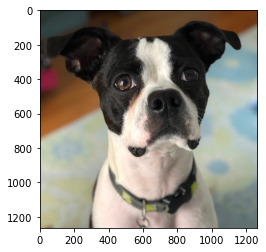

In [3]:
# Visualize the image using matplotlib
import matplotlib.pyplot as plt
plt.imshow(photo)


## Visualizing RGB Channels
Split the image into each RGB colors.

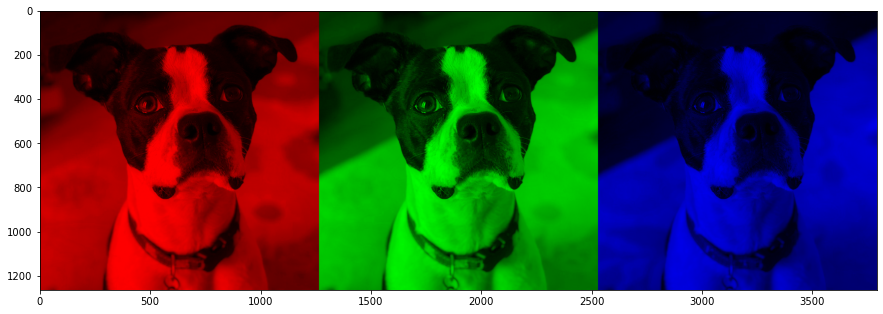

In [4]:
img = photo
img_R, img_G, img_B = img.copy(), img.copy(), img.copy()
img_R[:, :, (1, 2)] = 0
img_G[:, :, (0, 2)] = 0
img_B[:, :, (0, 1)] = 0
img_rgb = np.concatenate((img_R,img_G,img_B), axis=1)
plt.figure(figsize=(15, 15))
plt.imshow(img_rgb)

# Save to a New Format
----------------------

In [ ]:
# Save a new version in .tif format
io.imsave(fname="module-5-assets/pebbles.tif", arr=photo)
io.imsave(fname="module-5-assets/pebbles.bmp", arr=photo)
io.imsave(fname="module-5-assets/pebbles.gif", arr=photo)

# Applying Transformations to a Photo
---------------------

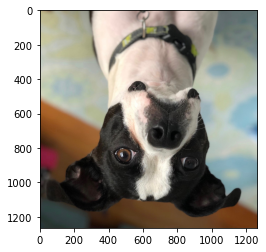

In [5]:
# Reverse the rows in the matrix to flip the image
plt.imshow(photo[::-1])

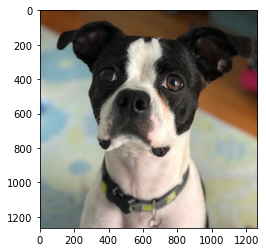

In [6]:
# Reverse the columns to mirror image
plt.imshow(photo[:,::-1])

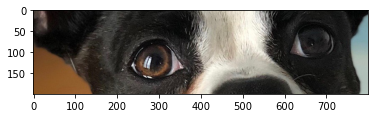

In [7]:
# Slice the image
plt.imshow(photo[300:500, 200:1000])

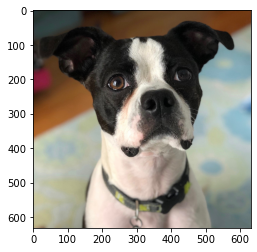

In [8]:
# Take everyother row and column to reduce the image by 50%.
# Can you even tell the difference by looking? Look at the 
# axis to prove it.
plt.imshow(photo[::2, ::2])

In [9]:
np.sum(photo)
np.mean(photo)
np.std(photo)

72.62307370724037

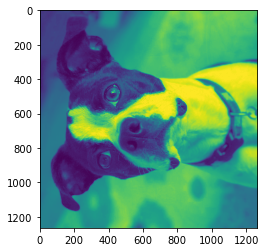

In [10]:
# Transpose of the photo array
plt.imshow(photo[:,:,0].T)

# Manipulating Pixels
----------------------

## Pixel Threshold
Since the image is stored as an array of numbers, we can simply look through the array for pixel color values that are less than some threshold value. This process is called thresholding.

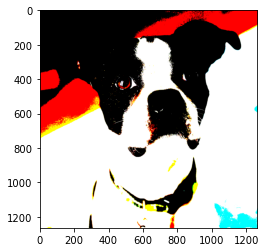

In [14]:
# Intensify the photo using a mask
# If value is greater than 100, set the color channel to the max value of 255, else set to 0
# In RGB, 0 means that no light comes through (black) and 255 means maximum light (white)
photo_mask = np.where(photo > 100, 255, 0)

# Alternative syntax to only drop low intensity pixels
# photo_mask[photo_mask < 100] = 0 

plt.imshow(photo_mask)

## Photo in 256, 64, and 128 bits

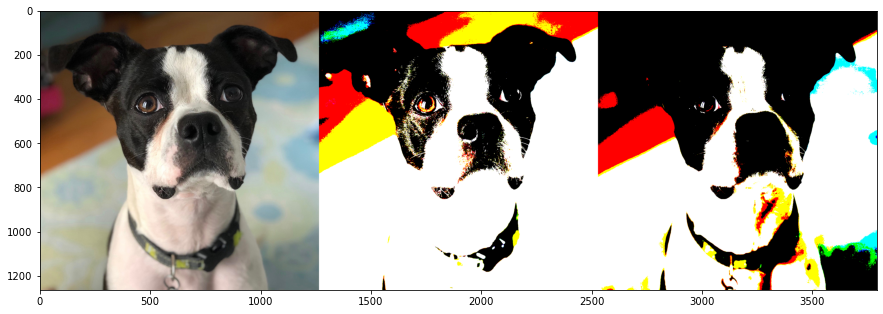

In [15]:
img = photo
img_64 = (img > 64) * 255
img_128 = (img > 128) * 255
fig = plt.figure(figsize=(15, 15))
img_all = np.concatenate((img, img_64, img_128), axis=1)
plt.imshow(img_all)

## Convert to Grayscale

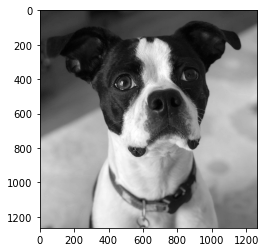

In [16]:
# Grayscale
import skimage.color

# read input image, based on filename parameter
photo_gray = skimage.io.imread('module-5-assets/pebbles.jpg', as_gray=True)

# display grayscale image
fig, ax = plt.subplots()
plt.imshow(photo_gray, cmap='gray')

## Convert to a Negative Image

Converting a color image to a negative image:
* First, get the RGB values of the pixel
* Calculate new RGB values using R = 255 – R, G = 255 – G, B = 255- B
* Save the new RGB values in the pixel


Text(0.5, 1.0, 'Negative of RGB image')

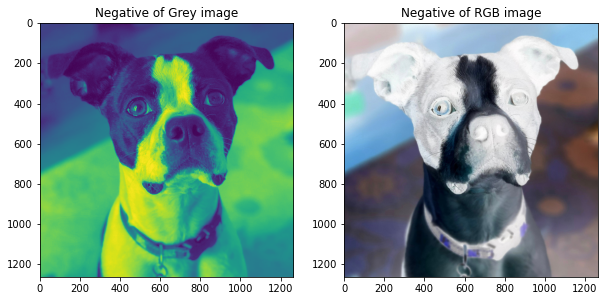

In [17]:
fig = plt.figure(figsize=(10, 10))

# Grayscale images
fig.add_subplot(1, 2, 1)
plt.imshow(photo_gray)
plt.title('Negative of Grey image')

# RGB image
xray = 255 - photo
fig.add_subplot(1, 2, 2)
plt.imshow(xray)

plt.title('Negative of RGB image')